<p style="font-size:3em;color:blue;">Predicting weight at birth based on US Birth data </p>

### Course Title - PCAM ZC321

### Course Title - PCAM ZC321

###  Problem Statement

Low birth weight (LBW) of an infant can have serious health effects on it in its later life. World Health Organization defines Low birth weight (LBW) as a birth weight of an infant weighing 2,499 g or less. The birth weight of a baby is notable because very low birth weight babies are 100 times more likely to die compared to normal birth weight babies. We have to predict
the weight of a baby


## DATA PRE-PROCESSING

#### Import all required libraries

In [1]:
#lets import all the required modules

import pandas as pd  
# numpy is already imported as np 

# for plotting a graph
import matplotlib.pyplot as plt

# numpy
import numpy as np

# to tell jupyter to display graphs inline
%matplotlib inline

# to parse datimeobject
from dateutil.parser import parse

# for datetime operations
import datetime

# for missing value visulization 
import missingno as msno

import seaborn as sns


import matplotlib.pyplot as plt


# algorithm
from sklearn.cluster import DBSCAN


from sklearn import metrics


from sklearn.neighbors import NearestNeighbors

#### Read Directory and get the file

In [2]:
# download the dataset to the working directory:
#In this case the dataset is stored in below directory:

#To execute the below python implementation, please change the path to the appropriate 
#directory in the "path" variable to run the program:

path = "C:\\Users\\user\\Documents\\CapstoneProject\\Data\\"
#path=""
filename = "US_births(2018).csv"
file=path+filename


# display path
print(file)



C:\Users\user\Documents\CapstoneProject\Data\US_births(2018).csv


#### Read datset

In [3]:
# read the data from csv from a panda function read_csv
# store the data in a data frame, call it birthdata

birthdata = pd.read_csv(file, low_memory=False)

In [4]:
# review the top 5 rows to get a glimse of the dataset1

birthdata.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0


In [5]:
# understand the dimensions of both the datasets.

print(birthdata.shape)

(3801534, 55)


In [6]:
birthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 55 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ATTEND       int64  
 1   BFACIL       int64  
 2   BMI          float64
 3   CIG_0        int64  
 4   DBWT         int64  
 5   DLMP_MM      int64  
 6   DLMP_YY      int64  
 7   DMAR         object 
 8   DOB_MM       int64  
 9   DOB_TT       int64  
 10  DOB_WK       int64  
 11  DOB_YY       int64  
 12  DWgt_R       int64  
 13  FAGECOMB     int64  
 14  FEDUC        int64  
 15  FHISPX       int64  
 16  FRACE15      int64  
 17  FRACE31      int64  
 18  FRACE6       int64  
 19  ILLB_R       int64  
 20  ILOP_R       int64  
 21  ILP_R        int64  
 22  IMP_SEX      object 
 23  IP_GON       object 
 24  LD_INDL      object 
 25  MAGER        int64  
 26  MAGE_IMPFLG  object 
 27  MAR_IMP      object 
 28  MBSTATE_REC  int64  
 29  MEDUC        int64  
 30  MHISPX       int64  
 31  MM_AICU      object 
 32

#### Determine Categorical values

In [7]:
# fetch the columns of the dataset
featureset = birthdata.columns

print(featureset)

Index(['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DBWT', 'DLMP_MM', 'DLMP_YY',
       'DMAR', 'DOB_MM', 'DOB_TT', 'DOB_WK', 'DOB_YY', 'DWgt_R', 'FAGECOMB',
       'FEDUC', 'FHISPX', 'FRACE15', 'FRACE31', 'FRACE6', 'ILLB_R', 'ILOP_R',
       'ILP_R', 'IMP_SEX', 'IP_GON', 'LD_INDL', 'MAGER', 'MAGE_IMPFLG',
       'MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MM_AICU', 'MRACE15',
       'MRACE31', 'MRACEIMP', 'MRAVE6', 'MTRAN', 'M_Ht_In', 'NO_INFEC',
       'NO_MMORB', 'NO_RISKS', 'PAY', 'PAY_REC', 'PRECARE', 'PREVIS',
       'PRIORDEAD', 'PRIORLIVE', 'PRIORTERM', 'PWgt_R', 'RDMETH_REC',
       'RESTATUS', 'RF_CESAR', 'RF_CESARN', 'SEX', 'WTGAIN'],
      dtype='object')


In [8]:
# we will define a maximum no of unique values in a column.
# this is max value is the maximum number of unique entries for a given feature, which will
# help us determine that a particular feature is categorical in nature.

In [9]:
maxi = 10 # threshold value
catcolumns = [] 
for i in featureset:
    if birthdata[i].nunique() < maxi:
        catcolumns.append(i)
        
print("Total Number of features identified as categorical: ")        
print(len(catcolumns))

Total Number of features identified as categorical: 
30


In [10]:
print("Categorical features are as below: ") 

print(catcolumns)

Categorical features are as below: 
['ATTEND', 'BFACIL', 'DLMP_YY', 'DMAR', 'DOB_WK', 'DOB_YY', 'FEDUC', 'FHISPX', 'FRACE6', 'IMP_SEX', 'IP_GON', 'LD_INDL', 'MAGE_IMPFLG', 'MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MM_AICU', 'MRACEIMP', 'MRAVE6', 'MTRAN', 'NO_INFEC', 'NO_MMORB', 'NO_RISKS', 'PAY', 'PAY_REC', 'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX']


In [11]:
# assign type as category for all features
for j in catcolumns:
    birthdata[j] = birthdata[j].astype('category')

In [12]:
birthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 55 columns):
 #   Column       Dtype   
---  ------       -----   
 0   ATTEND       category
 1   BFACIL       category
 2   BMI          float64 
 3   CIG_0        int64   
 4   DBWT         int64   
 5   DLMP_MM      int64   
 6   DLMP_YY      category
 7   DMAR         category
 8   DOB_MM       int64   
 9   DOB_TT       int64   
 10  DOB_WK       category
 11  DOB_YY       category
 12  DWgt_R       int64   
 13  FAGECOMB     int64   
 14  FEDUC        category
 15  FHISPX       category
 16  FRACE15      int64   
 17  FRACE31      int64   
 18  FRACE6       category
 19  ILLB_R       int64   
 20  ILOP_R       int64   
 21  ILP_R        int64   
 22  IMP_SEX      category
 23  IP_GON       category
 24  LD_INDL      category
 25  MAGER        int64   
 26  MAGE_IMPFLG  category
 27  MAR_IMP      category
 28  MBSTATE_REC  category
 29  MEDUC        category
 30  MHISPX       categ

In [13]:
birthdata.describe()

,BMI,CIG_0,DBWT,DLMP_MM,DOB_MM,DOB_TT,DWgt_R,FAGECOMB,FRACE15,FRACE31,...,MRACE31,M_Ht_In,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RF_CESARN,WTGAIN
count,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,...,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06
mean,2.881701e+01,1.573716e+00,3.266895e+03,1.092867e+01,6.560880e+00,1.229176e+03,2.002744e+02,3.959961e+01,1.945332e+01,1.921702e+01,...,1.633776e+00,6.430641e+01,5.320432e+00,1.349657e+01,2.819283e-01,1.337598e+00,7.611711e-01,1.760021e+02,3.278500e-01,3.161657e+01
std,1.272350e+01,8.244679e+00,6.194423e+02,1.979896e+01,3.419287e+00,6.366058e+02,1.059956e+02,2.245474e+01,3.743284e+01,3.750335e+01,...,1.815554e+00,3.788526e+00,1.512683e+01,1.434675e+01,5.135148e+00,4.593759e+00,5.774464e+00,1.250511e+02,3.277408e+00,1.915435e+01
min,1.300000e+01,0.000000e+00,2.270000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+02,1.100000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,0.000000e+00
25%,2.230000e+01,0.000000e+00,2.960000e+03,4.000000e+00,4.000000e+00,7.590000e+02,1.600000e+02,2.800000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,6.200000e+01,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+02,0.000000e+00,2.000000e+01
50%,2.580000e+01,0.000000e+00,3.300000e+03,7.000000e+00,7.000000e+00,1.236000e+03,1.820000e+02,3.300000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,6.400000e+01,3.000000e+00,1.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+02,0.000000e+00,3.000000e+01
75%,3.110000e+01,0.000000e+00,3.629000e+03,1.000000e+01,9.000000e+00,1.733000e+03,2.120000e+02,3.800000e+01,4.000000e+00,4.000000e+00,...,2.000000e+00,6.600000e+01,3.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.820000e+02,0.000000e+00,4.000000e+01
max,9.990000e+01,9.900000e+01,9.999000e+03,9.900000e+01,1.200000e+01,9.999000e+03,9.990000e+02,9.900000e+01,9.900000e+01,9.900000e+01,...,3.100000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.990000e+02,9.900000e+01,9.900000e+01


## Missing value

In [14]:
# Missing value count
birthdata_missing=birthdata
birthdata_missing.replace(' ', np.nan, inplace=True,regex=True)
birthdata_missing.isnull().sum()


ATTEND               0
BFACIL               0
BMI                  0
CIG_0                0
DBWT                 0
DLMP_MM              0
DLMP_YY              0
DMAR            456083
DOB_MM               0
DOB_TT               0
DOB_WK               0
DOB_YY               0
DWgt_R               0
FAGECOMB             0
FEDUC                0
FHISPX               0
FRACE15              0
FRACE31              0
FRACE6               0
ILLB_R               0
ILOP_R               0
ILP_R                0
IMP_SEX        3801444
IP_GON               0
LD_INDL              0
MAGER                0
MAGE_IMPFLG    3801060
MAR_IMP        3799539
MBSTATE_REC          0
MEDUC                0
MHISPX               0
MM_AICU              0
MRACE15              0
MRACE31              0
MRACEIMP       3561344
MRAVE6               0
MTRAN                0
M_Ht_In              0
NO_INFEC             0
NO_MMORB             0
NO_RISKS             0
PAY                  0
PAY_REC              0
PRECARE    

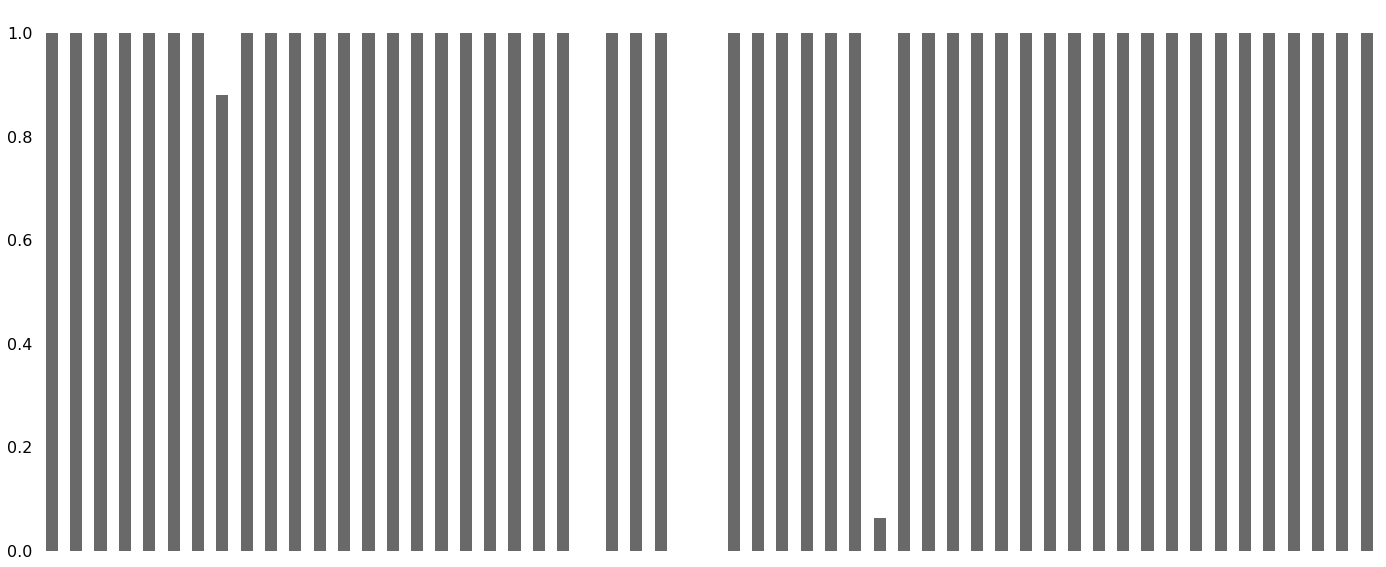

In [15]:
msno.bar(birthdata_missing) 

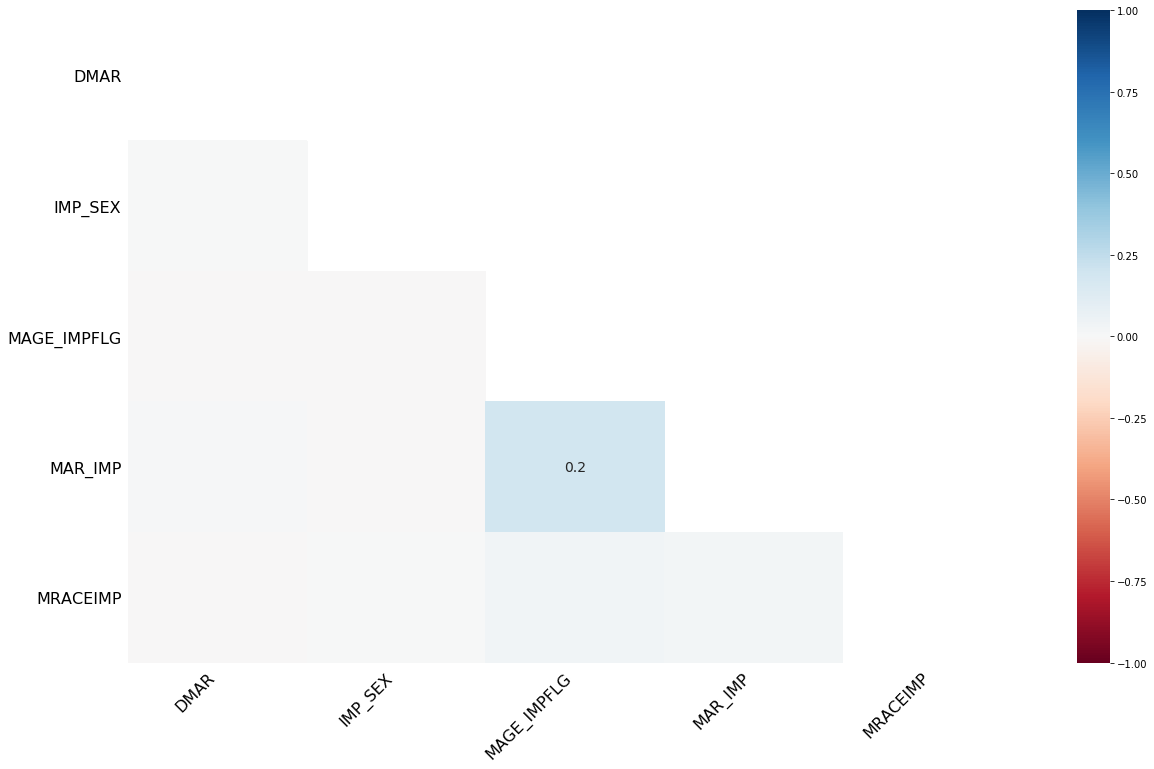

In [16]:
msno.heatmap(birthdata_missing)

In [17]:
# Missing value %
percent_missing = birthdata_missing.isnull().sum() * 100 / len(birthdata)
missing_value_df = pd.DataFrame({'column_name': birthdata.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)


In [18]:
print("Missing value percentage: ") 
missing_value_df

Missing value percentage: 


,column_name,percent_missing
IMP_SEX,IMP_SEX,99.997633
MAGE_IMPFLG,MAGE_IMPFLG,99.987531
MAR_IMP,MAR_IMP,99.947521
MRACEIMP,MRACEIMP,93.681761
DMAR,DMAR,11.997341
PAY,PAY,0.000000
MM_AICU,MM_AICU,0.000000
MRACE15,MRACE15,0.000000
MRACE31,MRACE31,0.000000
MRAVE6,MRAVE6,0.000000


In [19]:
# droping the column where missing value % is greater than 30%
missing_drop = list(missing_value_df[missing_value_df.percent_missing>30].column_name)
birthdata_missing = birthdata_missing.drop(missing_drop, axis=1)
print("After droping column") 
birthdata_missing

After droping column


,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN
0,1,1,30.7,0,3657,4,2017,1,1,1227,...,0,1,2,190,1,2,N,0,M,41
1,1,1,33.3,2,3242,99,9999,2,1,1704,...,0,2,0,188,4,2,Y,2,F,0
2,1,1,30.0,0,3470,4,2017,1,1,336,...,0,1,0,215,1,1,N,0,M,58
3,3,1,23.7,0,3140,5,2017,2,1,938,...,0,2,0,138,1,2,N,0,F,0
4,1,1,35.5,0,2125,99,9999,1,1,830,...,0,1,4,220,3,1,N,0,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801529,1,1,26.3,0,2140,4,2018,2,12,1531,...,0,1,0,168,4,1,Y,1,M,47
3801530,1,1,32.4,0,3560,3,2018,2,12,2347,...,0,2,1,195,1,1,N,0,M,10
3801531,5,7,27.6,0,3367,3,2018,2,11,1354,...,0,5,1,156,1,1,N,0,F,22
3801532,5,4,99.9,98,320,3,2018,2,8,859,...,0,0,0,999,5,1,U,99,M,99


In [20]:
# missing value count after column drop
birthdata_missing.isnull().sum()

ATTEND              0
BFACIL              0
BMI                 0
CIG_0               0
DBWT                0
DLMP_MM             0
DLMP_YY             0
DMAR           456083
DOB_MM              0
DOB_TT              0
DOB_WK              0
DOB_YY              0
DWgt_R              0
FAGECOMB            0
FEDUC               0
FHISPX              0
FRACE15             0
FRACE31             0
FRACE6              0
ILLB_R              0
ILOP_R              0
ILP_R               0
IP_GON              0
LD_INDL             0
MAGER               0
MBSTATE_REC         0
MEDUC               0
MHISPX              0
MM_AICU             0
MRACE15             0
MRACE31             0
MRAVE6              0
MTRAN               0
M_Ht_In             0
NO_INFEC            0
NO_MMORB            0
NO_RISKS            0
PAY                 0
PAY_REC             0
PRECARE             0
PREVIS              0
PRIORDEAD           0
PRIORLIVE           0
PRIORTERM           0
PWgt_R              0
RDMETH_REC

## Imputing missing value 

In [21]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")
for ColName in birthdata_missing[['DMAR']]:
    print("{} = {}".format(ColName,       len(birthdata_missing[ColName].unique())))

Number of Categories in: 
DMAR = 3


In [22]:
#1. Function to replace NAN values with mode value

def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
#2. Call function to impute most occured category
for Columns in ['DMAR']:
    impute_nan_most_frequent_category(birthdata_missing,Columns)
    

#3. Drop actual columns
birthdata_missing = birthdata_missing.drop(['DMAR'], axis = 1)

# missing value count after column drop
print("Count of missing value after imputation")
birthdata_missing.isnull().sum()

Count of missing value after imputation


ATTEND          0
BFACIL          0
BMI             0
CIG_0           0
DBWT            0
DLMP_MM         0
DLMP_YY         0
DOB_MM          0
DOB_TT          0
DOB_WK          0
DOB_YY          0
DWgt_R          0
FAGECOMB        0
FEDUC           0
FHISPX          0
FRACE15         0
FRACE31         0
FRACE6          0
ILLB_R          0
ILOP_R          0
ILP_R           0
IP_GON          0
LD_INDL         0
MAGER           0
MBSTATE_REC     0
MEDUC           0
MHISPX          0
MM_AICU         0
MRACE15         0
MRACE31         0
MRAVE6          0
MTRAN           0
M_Ht_In         0
NO_INFEC        0
NO_MMORB        0
NO_RISKS        0
PAY             0
PAY_REC         0
PRECARE         0
PREVIS          0
PRIORDEAD       0
PRIORLIVE       0
PRIORTERM       0
PWgt_R          0
RDMETH_REC      0
RESTATUS        0
RF_CESAR        0
RF_CESARN       0
SEX             0
WTGAIN          0
DMAR_Imputed    0
dtype: int64

In [23]:
print("Dataset after imputation")
print(birthdata_missing.shape)

Dataset after imputation
(3801534, 51)


In [24]:
# Now we create a dataset only of numerical features
allcolumns=birthdata_missing.columns.tolist()

allcolumns

['ATTEND',
 'BFACIL',
 'BMI',
 'CIG_0',
 'DBWT',
 'DLMP_MM',
 'DLMP_YY',
 'DOB_MM',
 'DOB_TT',
 'DOB_WK',
 'DOB_YY',
 'DWgt_R',
 'FAGECOMB',
 'FEDUC',
 'FHISPX',
 'FRACE15',
 'FRACE31',
 'FRACE6',
 'ILLB_R',
 'ILOP_R',
 'ILP_R',
 'IP_GON',
 'LD_INDL',
 'MAGER',
 'MBSTATE_REC',
 'MEDUC',
 'MHISPX',
 'MM_AICU',
 'MRACE15',
 'MRACE31',
 'MRAVE6',
 'MTRAN',
 'M_Ht_In',
 'NO_INFEC',
 'NO_MMORB',
 'NO_RISKS',
 'PAY',
 'PAY_REC',
 'PRECARE',
 'PREVIS',
 'PRIORDEAD',
 'PRIORLIVE',
 'PRIORTERM',
 'PWgt_R',
 'RDMETH_REC',
 'RESTATUS',
 'RF_CESAR',
 'RF_CESARN',
 'SEX',
 'WTGAIN',
 'DMAR_Imputed']

In [25]:
birthdata_numerical = birthdata_missing._get_numeric_data()

birthdata_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 25 columns):
 #   Column     Dtype  
---  ------     -----  
 0   BMI        float64
 1   CIG_0      int64  
 2   DBWT       int64  
 3   DLMP_MM    int64  
 4   DOB_MM     int64  
 5   DOB_TT     int64  
 6   DWgt_R     int64  
 7   FAGECOMB   int64  
 8   FRACE15    int64  
 9   FRACE31    int64  
 10  ILLB_R     int64  
 11  ILOP_R     int64  
 12  ILP_R      int64  
 13  MAGER      int64  
 14  MRACE15    int64  
 15  MRACE31    int64  
 16  M_Ht_In    int64  
 17  PRECARE    int64  
 18  PREVIS     int64  
 19  PRIORDEAD  int64  
 20  PRIORLIVE  int64  
 21  PRIORTERM  int64  
 22  PWgt_R     int64  
 23  RF_CESARN  int64  
 24  WTGAIN     int64  
dtypes: float64(1), int64(24)
memory usage: 725.1 MB


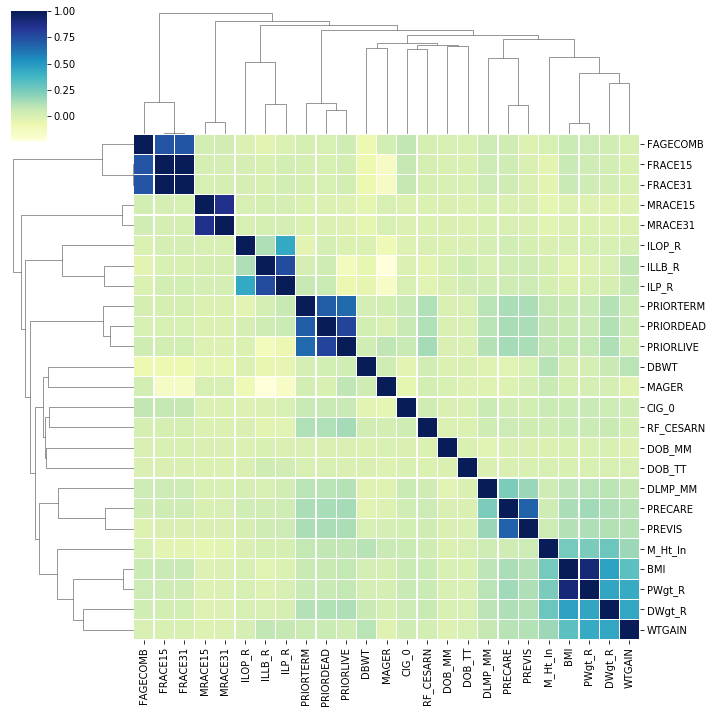

In [26]:
# find correlation
corrdata = birthdata_missing.corr() 
  
c = sns.clustermap(corrdata, cmap ="YlGnBu", linewidths = 0.2); 
plt.setp(c.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
c

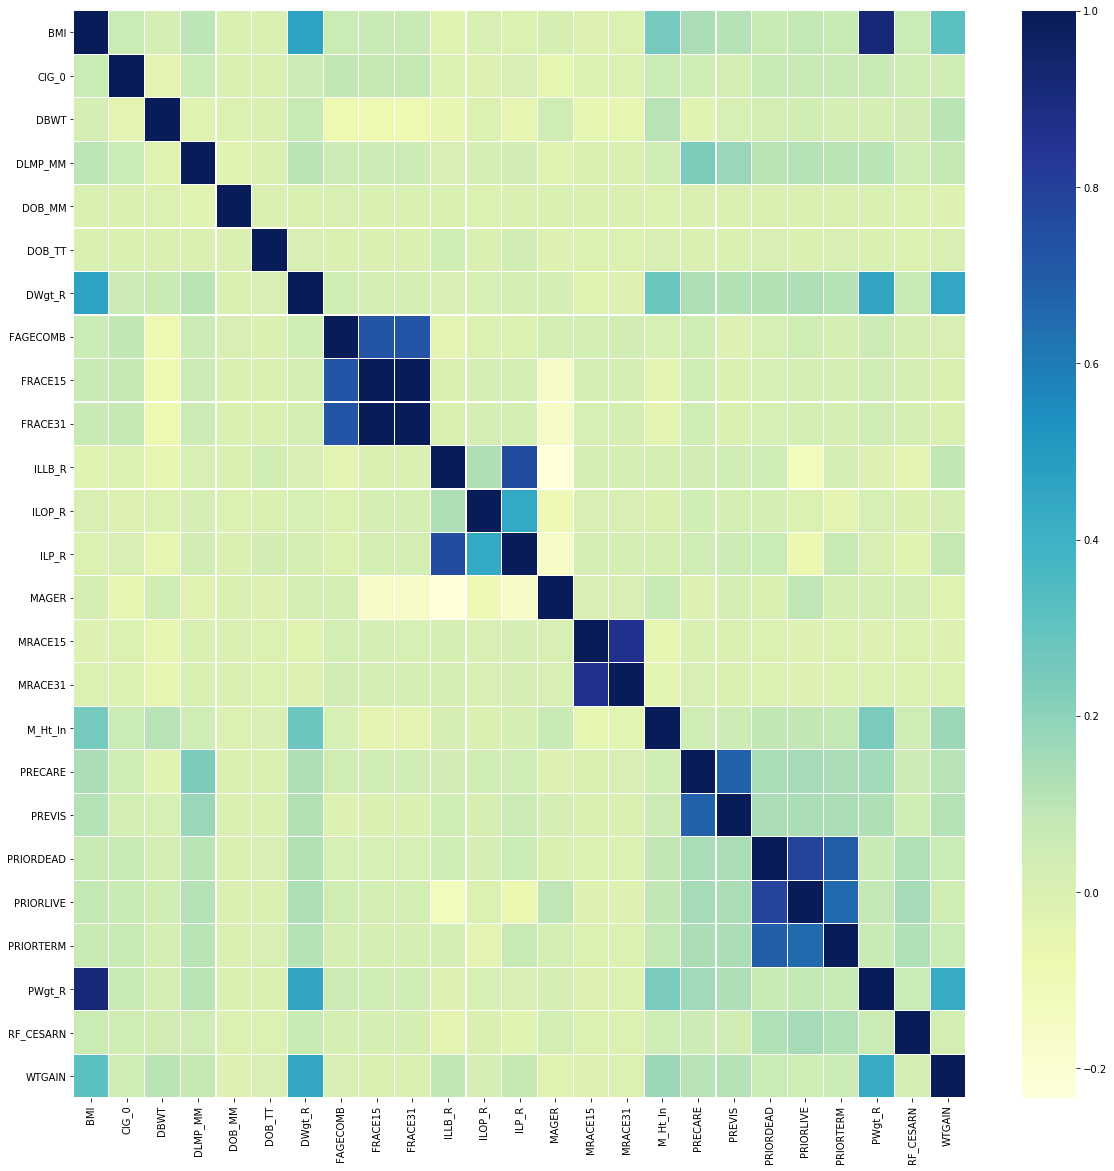

In [27]:
corrmat = birthdata_numerical.corr() 
  
f, ax = plt.subplots(figsize =(20, 20)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

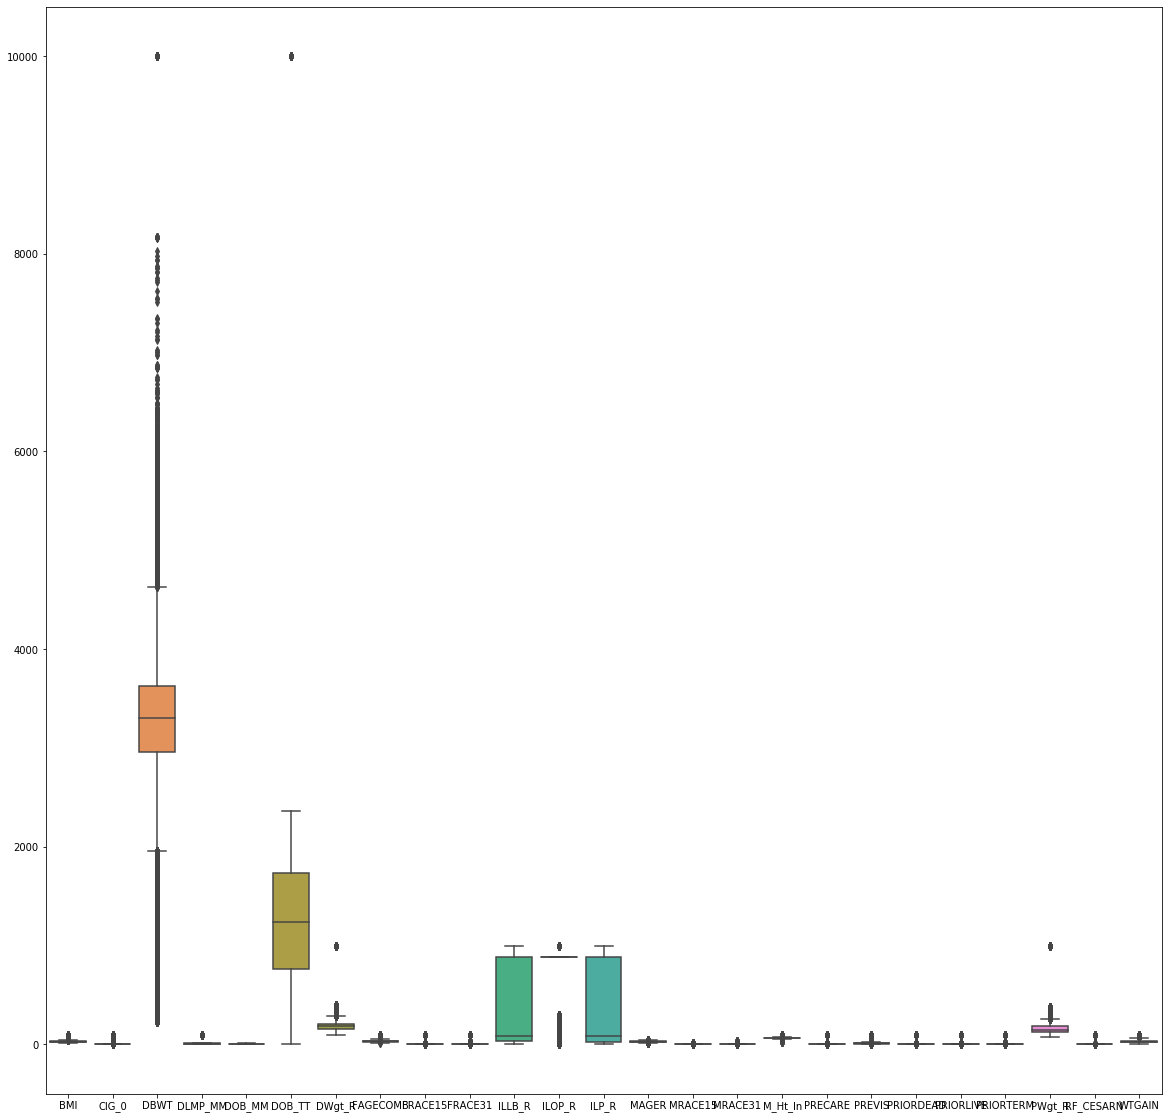

In [28]:
fig= plt.figure(figsize=(20,20))
sns.boxplot(data=birthdata_numerical)
plt.show()

## Outlier detection with KMeans

# this is taking a lot of time. Unable to run it.
# Everytime I run it it hangs, and i have to restart kernel

# This piece of code is to indetify the epsilon value for DBSCAN

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(birthdata_numerical)
distances, indices = nbrs.kneighbors(birthdata_numerical)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


dbscan = DBSCAN(eps = 0.4, min_samples = 10)
dbscan.fit(birthdata_numerical)

# visualize outputs
colors = model.labels_
plt.scatter(birthdata_numerical, c = colors)

In [30]:
# Scaling Data
from sklearn.preprocessing import StandardScaler 

In [39]:
# Initialise the Scaler 
birthdata_numerical_S = StandardScaler().fit_transform(birthdata_numerical)

In [45]:
birthdata_numerical_S.shape

(3801534, 25)

In [32]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters = 1).fit(birthdata_numerical_S)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [47]:
center = kmeans.cluster_centers_
print(center)

[[ 5.41186892e-14 -1.59402852e-13 -1.76778996e-15 -2.68463246e-13
  -1.64021361e-13 -1.00099424e-15  2.96313045e-14  5.30387989e-14
  -7.63635341e-13 -9.24695367e-13 -2.68626726e-13  4.19270265e-13
   5.50158538e-13  4.24665842e-14 -9.61279786e-13 -4.89912639e-13
  -1.96202416e-14 -5.20393189e-13 -3.81475698e-14  6.85395390e-13
   2.15061625e-13  9.96413301e-13  7.97177012e-15 -7.30954890e-14
   5.86851235e-14]]


In [48]:
from numpy import sqrt, random, array, argsort

In [49]:
distance = sqrt((birthdata_numerical_S - center)**2)

In [50]:
order_index = argsort(distance, axis = 0)
indexes = order_index[-5:]

In [52]:
values = birthdata_numerical_S[indexes]


In [59]:
indexes.shape

(5, 25)

In [53]:
x_ax = range(3801534)

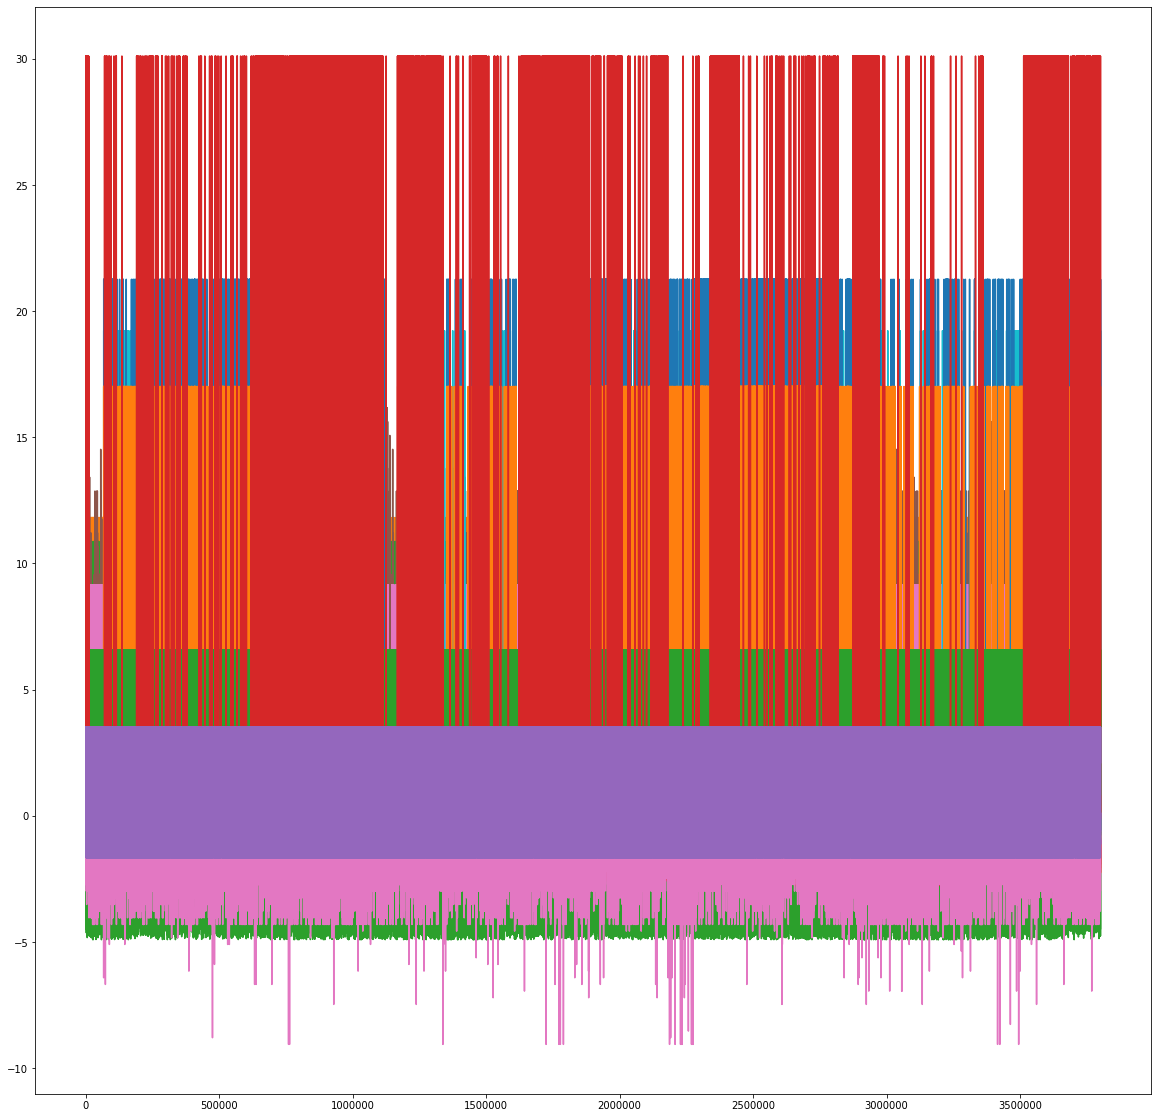

In [55]:
fig= plt.figure(figsize=(20,20))
plt.plot(x_ax, birthdata_numerical_S)
plt.show()

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(birthdata_missing))
z